In [1]:
import gym
import numpy as np
from python.agents import E_greedy, Estimator, U_e_greedy

In [2]:
episodes = 50
T = 400
runs = 10

classic_perf = np.empty((runs, episodes))
classic_cost = np.empty((runs, episodes))
uplift_perf = np.empty((runs, episodes))
uplift_cost = np.empty((runs, episodes))

In [3]:
env = gym.make('MountainCar-v0').env
for r in range(runs):
    est = Estimator(3, .01, env)
    e_greedy = E_greedy(0, est, 1, .9, np.array([1,0,1]))
    for e in range(episodes):
        res, cost = e_greedy.run(T, env)
        classic_perf[r][e] = T if res==-1 else res
        classic_cost[r][e] = cost/classic_perf[r][e]
        #print('episode: {}, res: {}, cost: {}'.format(e, classic_perf[r][e], classic_cost[r][e]))
    print("finished run {}".format(r))

/Users/jeroen/Applications/anaconda3/envs/EEML/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
finished run 0
finished run 1
finished run 2
finished run 3
finished run 4
finished run 5
finished run 6
finished run 7
finished run 8
finished run 9


In [4]:
env = gym.make('MountainCar-v0').env
for r in range(runs):
    est = Estimator(3, .01, env)
    e_greedy = U_e_greedy(0, est, 1, .9, np.array([1,0,1]))
    for e in range(episodes):
        res, cost = e_greedy.run(T, env)
        uplift_perf[r][e] = T if res==-1 else res
        uplift_cost[r][e] = cost/uplift_perf[r][e]
        #print('episode: {}, res: {}, cost: {}'.format(e, uplift_perf[r][e], uplift_cost[r][e]))
    print("finished run {}".format(r))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
finished run 0
finished run 1
finished run 2
finished run 3
finished run 4
finished run 5
finished run 6
finished run 7
finished run 8
finished run 9


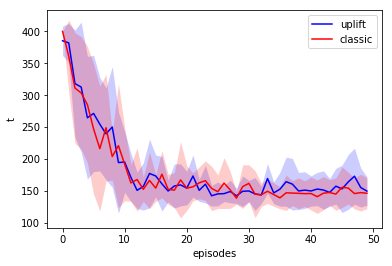

In [10]:
import matplotlib.pyplot as plt

x = np.arange(0, episodes, 1)
avg_u = np.average(uplift_perf, axis=0)
std_u = np.std(uplift_perf, axis=0)
avg_c = np.average(classic_perf, axis=0)
std_c = np.std(classic_perf, axis=0)



fig_perf, ax_perf = plt.subplots()
ax_perf.plot(x, avg_u, color='blue', label='uplift')
ax_perf.fill_between(x, avg_u - std_u, avg_u + std_u, color='blue', alpha=.2, linewidth=0)

ax_perf.plot(x, avg_c, color='red', label='classic')
ax_perf.fill_between(x, avg_c - std_c, avg_c + std_c, color='red', alpha=.2, linewidth=0)



ax_perf.set(xlabel='episodes', ylabel='t')
ax_perf.legend()
plt.show()

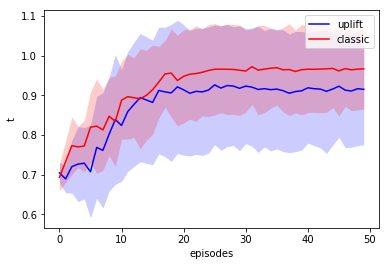

In [9]:
x = np.arange(0, episodes, 1)
avg_u = np.average(uplift_cost, axis=0)
std_u = np.std(uplift_cost, axis=0)
avg_c = np.average(classic_cost, axis=0)
std_c = np.std(classic_cost, axis=0)



fig_perf, ax_perf = plt.subplots()
uplift = ax_perf.plot(x, avg_u, color='blue', label='uplift')
ax_perf.fill_between(x, avg_u - std_u, avg_u + std_u, color='blue', alpha=.2, linewidth=0)

classic = ax_perf.plot(x, avg_c, color='red', label='classic')
ax_perf.fill_between(x, avg_c - std_c, avg_c + std_c, color='red', alpha=.2, linewidth=0)



ax_perf.set(xlabel='episodes', ylabel='t')
ax_perf.legend()

plt.show()